In [1]:
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


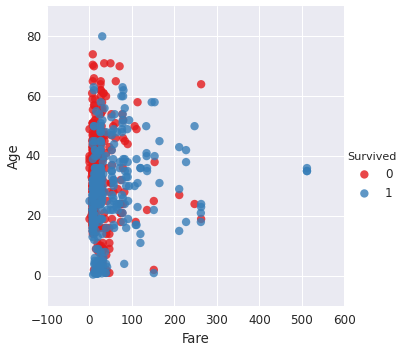

In [13]:

# Plot 
sns.lmplot('Fare', 'Age', data=data, hue='Survived',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

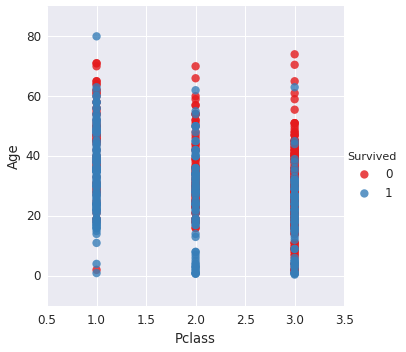

In [14]:

# Plot two ingredients
sns.lmplot('Pclass', 'Age', data=data, hue='Survived',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [22]:
data['Pclass']

0      3
1      1
2      3
3      1
4      3
5      3
6      1
7      3
8      3
9      2
10     3
11     1
12     3
13     3
14     3
15     2
16     3
17     2
18     3
19     3
20     2
21     2
22     3
23     1
24     3
25     3
26     3
27     1
28     3
29     3
      ..
861    2
862    1
863    3
864    2
865    2
866    2
867    1
868    3
869    3
870    3
871    1
872    1
873    3
874    2
875    3
876    3
877    3
878    3
879    1
880    2
881    3
882    3
883    2
884    3
885    3
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

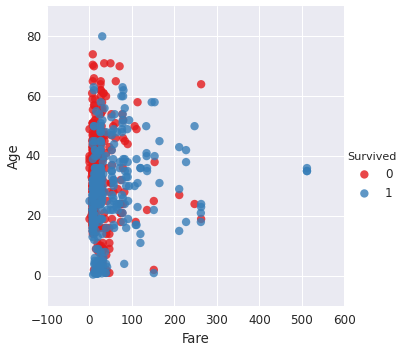

In [16]:

# Plot two ingredients
sns.lmplot('Fare', 'Age', data=data, hue='Survived',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [26]:
#lets normalize some columns
data['Pclass'] = data['Pclass'] / data['Pclass'].max(axis=0)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.000000,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,0.333333,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,1.000000,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,0.333333,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,1.000000,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,1.000000,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,0.333333,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,1.000000,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,1.000000,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,0.666667,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [27]:
data['Fare'] = data['Fare'] / data['FareFare'].max(axis=0)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.000000,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.014151,NaN,S
1,2,1,0.333333,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.139136,C85,C
2,3,1,1.000000,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,0.333333,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.103644,C123,S
4,5,0,1.000000,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.015713,NaN,S
5,6,0,1.000000,"Moran, Mr. James",male,NaN,0,0,330877,0.016510,NaN,Q
6,7,0,0.333333,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,0.101229,E46,S
7,8,0,1.000000,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,0.041136,NaN,S
8,9,1,1.000000,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,0.021731,NaN,S
9,10,1,0.666667,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,0.058694,NaN,C


In [28]:
data['Age'] = data['Age'] / data['Age'].max(axis=0)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.000000,"Braund, Mr. Owen Harris",male,0.2750,1,0,A/5 21171,0.014151,NaN,S
1,2,1,0.333333,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.4750,1,0,PC 17599,0.139136,C85,C
2,3,1,1.000000,"Heikkinen, Miss. Laina",female,0.3250,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,0.333333,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.4375,1,0,113803,0.103644,C123,S
4,5,0,1.000000,"Allen, Mr. William Henry",male,0.4375,0,0,373450,0.015713,NaN,S
5,6,0,1.000000,"Moran, Mr. James",male,NaN,0,0,330877,0.016510,NaN,Q
6,7,0,0.333333,"McCarthy, Mr. Timothy J",male,0.6750,0,0,17463,0.101229,E46,S
7,8,0,1.000000,"Palsson, Master. Gosta Leonard",male,0.0250,3,1,349909,0.041136,NaN,S
8,9,1,1.000000,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0.3375,0,2,347742,0.021731,NaN,S
9,10,1,0.666667,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.1750,1,0,237736,0.058694,NaN,C


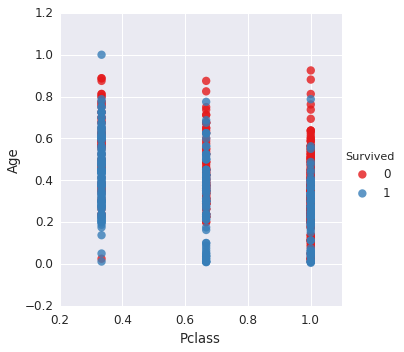

In [35]:
sns.lmplot('Pclass', 'Age', data=data, hue='Survived',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [36]:
#survival rates vary with the class, should train seprate algo for each pclass
sns.factorplot(x="Pclass", y="Survived", hue="sex", data=data,
                   size=6, kind="bar", palette="muted")

ValueError: Could not interpret input 'sex'

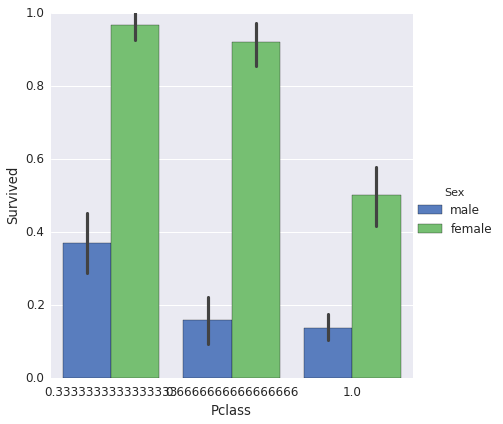

In [39]:
sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=data,
                   size=6, kind="bar", palette="muted")

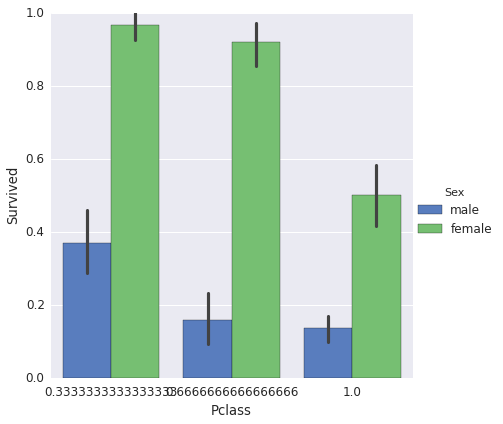

In [40]:
g=sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=data,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)


In [87]:
# select datasubset of first class only

firstClassPassengers = data[data['Pclass'] == 1]
firstClassPassengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.0,"Braund, Mr. Owen Harris",male,0.27500,1,0,A/5 21171,0.014151,NaN,S
2,3,1,1.0,"Heikkinen, Miss. Laina",female,0.32500,0,0,STON/O2. 3101282,0.015469,NaN,S
4,5,0,1.0,"Allen, Mr. William Henry",male,0.43750,0,0,373450,0.015713,NaN,S
5,6,0,1.0,"Moran, Mr. James",male,NaN,0,0,330877,0.016510,NaN,Q
7,8,0,1.0,"Palsson, Master. Gosta Leonard",male,0.02500,3,1,349909,0.041136,NaN,S
8,9,1,1.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0.33750,0,2,347742,0.021731,NaN,S
10,11,1,1.0,"Sandstrom, Miss. Marguerite Rut",female,0.05000,1,1,PP 9549,0.032596,G6,S
12,13,0,1.0,"Saundercock, Mr. William Henry",male,0.25000,0,0,A/5. 2151,0.015713,NaN,S
13,14,0,1.0,"Andersson, Mr. Anders Johan",male,0.48750,1,5,347082,0.061045,NaN,S
14,15,0,1.0,"Vestrom, Miss. Hulda Amanda Adolfina",female,0.17500,0,0,350406,0.015330,NaN,S


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


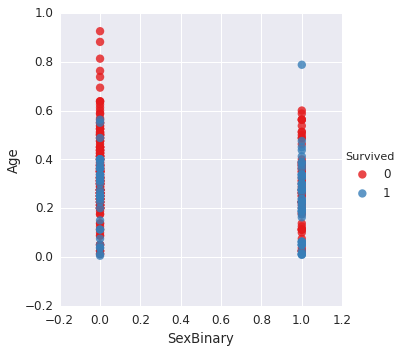

In [103]:
#binarize sex
firstClassPassengers['SexBinary'] = np.where(firstClassPassengers['Sex'] == 'male', 0, 1)

#plot sex and age of firstClassPassengers
sns.lmplot('SexBinary', 'Age', data=firstClassPassengers, hue='Survived',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,0.333333,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.4750,1,0,PC 17599,0.139136,C85,C
2,3,1,1.000000,"Heikkinen, Miss. Laina",female,0.3250,0,0,STON/O2. 3101282,0.015469,NaN,S
3,4,1,0.333333,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.4375,1,0,113803,0.103644,C123,S
8,9,1,1.000000,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0.3375,0,2,347742,0.021731,NaN,S
9,10,1,0.666667,"Nasser, Mrs. Nicholas (Adele Achem)",female,0.1750,1,0,237736,0.058694,NaN,C
10,11,1,1.000000,"Sandstrom, Miss. Marguerite Rut",female,0.0500,1,1,PP 9549,0.032596,G6,S
11,12,1,0.333333,"Bonnell, Miss. Elizabeth",female,0.7250,0,0,113783,0.051822,C103,S
14,15,0,1.000000,"Vestrom, Miss. Hulda Amanda Adolfina",female,0.1750,0,0,350406,0.015330,NaN,S
15,16,1,0.666667,"Hewlett, Mrs. (Mary D Kingcome)",female,0.6875,0,0,248706,0.031230,NaN,S
18,19,0,1.000000,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,0.3875,1,0,345763,0.035134,NaN,S


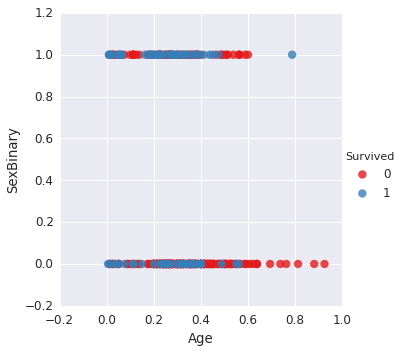

In [109]:
sns.lmplot('Age', 'SexBinary', data=firstClassPassengers, hue='Survived',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

#divide datasets between male and female
femalePassengers = data[data['Sex'] == 'female']
femalePassengers

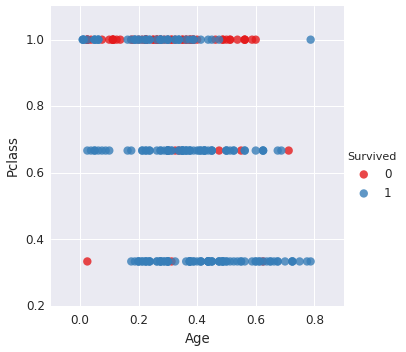

In [110]:
sns.lmplot('Age', 'Pclass', data=femalePassengers, hue='Survived',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

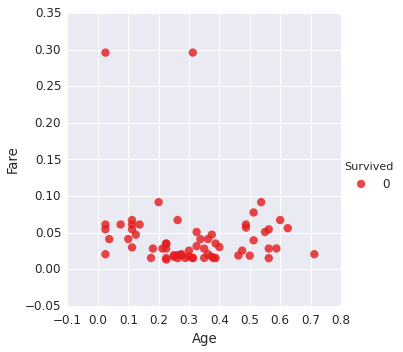

In [113]:
sns.lmplot('Age', 'Fare', data=femalePassengers[femalePassengers['Survived'] == 0], hue='Survived',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

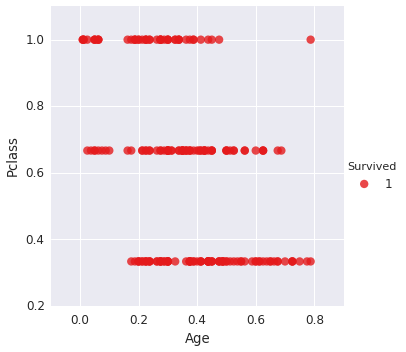

In [115]:
sns.lmplot('Age', 'Pclass', data=femalePassengers[femalePassengers['Survived'] == 1], hue='Survived',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

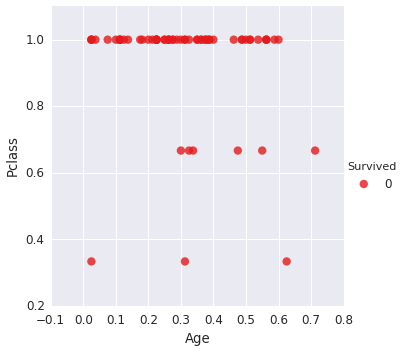

In [116]:
sns.lmplot('Age', 'Pclass', data=femalePassengers[femalePassengers['Survived'] == 0], hue='Survived',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [ ]:
# conclusion: svm not an ideal candidate for this. try decision tree